# INFO 2950 Group Project: What Makes a Nobel Prize Laureate?

## Introduction

The Nobel Prize represents the highest standards of excellence and is the most prestigious recognition for scholars in the fields of physics, chemistry, physiology or medicine, literature, economics, and peace. Nobel laureates made groundbreaking discoveries for mankind with unprecedented collaboration and unimaginable efforts. Judging from the 121 years of history since the first Nobel was awarded in 1901, we should applaud for the fairness and integrity of the Nobel committee, but we also have to recognize the need to promote changes that encourage inclusion in gender, age, geography in the Nobel landscape. The inclusion of different groups could be an indicator of what the academic community is paying attention to, encouraging more demographics to pursue excellence in academics. This study aims to examine whether the committee exhibits a bias among different groups - and if so, what groups the Nobel committee should pay more attention to.

The main question we were interested in exploring was: what characteristics are likely among Nobel laureates, and what biases do those characteristics potentially reveal within the Nobel committee?

Due to the scope of this project, we focused on a few more specific areas for our analysis:  
    
What countries produce the most Nobel laureates? 
    
Are Nobel laureates more likely to hail from the Anglosphere? 
    
Does age have any bearing on the awarding of a Nobel Prize? 
    
Are Nobel Prize laureates getting older?

Main findings/brief summary

## Data Description

#### What are the observations (rows) and the attributes (columns)?

The observations in our data frame are 937 Nobel Prize laureates, representing all winners from the first prizes awarded through the year 2016. In other words, each row represents a single laureate.

The attributes are:

- id - identifies each laureate 
- firstname - laureate's first name 
- surname - laureate's surname 
- born - laureate's birth date 
- died - laureate's death date 
- bornCountry - laureate's birth place 
- bornCountryCode - the country code of the laureate's country of origin
- bornCity - the name of the city where the laureate was born
- diedCountry - the name of the country where the laureate died
- diedCountryCode - the country code of the laureate's country of death
- diedCity - the name of the city where the laureate died
- gender - laureate's gender or laureate's organization ('male,' 'female,' or 'org' - organization)
- year - the year that the laureate won their prize
- category - the category in which the laureate won their prize ('physics,' 'chemistry,' 'peace,' 'medicine,' 'literature,' 'economics')
- overallMotivation - overall motivation for being awarded the prize
- share - number of other laureates who share the prize 
- motivation - the motivation behind being awarded the prize

#### Why was this dataset created?

The dataset was assembled by Maryna Kuzmenko in 2016, and intended to be a starting point for social sciences research into the characteristics of Nobel prize awards and laureates (both quantitative and categorical). It is available through the Harvard Dataverse Repository. 

#### Who funded the creation of the dataset?

Harvard's Dataverse Repository is free and open to researchers for sharing and archiving research data. Maryna Kuzmenko holds a Doctorate of Philosophy; no information on the funding for the creation of this particular dataset is available, but it appears to have been created while she was pursuing her doctorate at Kyiv University. 

#### Are there any errors, sources of noise, or redundancies in the dataset?

We were able to identify one section of rows that seemed to be included erroneously (containing no data except for the gender characteristic, and not matching with any potential missing data that we could find). As such, we removed those rows from the dataset before continuing with our own analysis.

#### Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.

By the nature of our dataset, each instance is identifiable as a specific person, by name, location, age, and more. This was determined not to be a privacy concern, because of the public nature of the Nobel Prize and its laureates.  

#### What processes might have influenced what data was observed and recorded and what was not?

Fortunately for us, the Nobel Prize is a prestigious and public-facing award for excellence in a field; as such, information about each year's awards, and the laureates who received them, is generally well-documented. We are reassured by the completeness of our dataset: though not every row is perfectly complete, as a whole data on each laureate is present and accurate (by our appraisal). 

#### What preprocessing was done, and how did the data come to be in the form that you are using?

The data on each laureate was collected into a single .csv file, with each instance representing a single Nobel Prize winner, and columns with characteristics about each of those instances. The entire population of laureates (through 2016) is represented, and no transformations or further processing was done to the data once collected. 

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Though there is no record that the Nobel laureates that were living at the time this dataset was assembled were notified, the data collected about them (as at least semi-public figures) is publicly available. 

#### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)

https://drive.google.com/file/d/1x30zuyFBpWepBgc7cQt9x1yU46Qscgtg/view?usp=sharing

## Preregistration Statement

##### Hypothesis 1:
**Nobel laureates are not more or less likely to win at a certain age. ($\beta_{age}$ = 0)**

It seemed that most recent discoveries are not usually recognized by the Nobel Prize right away. We wanted to look into the potential relationship that might exist between age and win. We will also consider outliers that may exist in our data to get a full scope of how the likelihood of winning the prize might change as age changes.

##### Hypothesis 2:
**Nobel Laureates are more likely to come from English-speaking countries. ($\beta_{English-speaking}$ > 0)**

Nobel Prizes are one of the most prestigious awards around the world. We wanted to test how well the Nobel Prize recognizes contributions made globally, not just by some people in select countries. 

## Data Analysis

In [385]:
import pandas as pd 
import numpy as np
import seaborn 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from matplotlib import pyplot
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from scipy.stats import pearsonr

nobel_data = pd.read_csv('nobel_data_final.csv')

#### Section 1: Age of a Nobel laureate

To begin analysis of Nobel laureate age, we created a new dataframe, nobel_data_valid, without any "age" values that are 0 so that we can create models using the "age" column without instances that are missing their ages. Nearly all of these rows represent organizational winners, rather than individuals, so the age data for these instances would not be relevant to our analysis.

In [386]:
nobel_data_valid = nobel_data.loc[nobel_data['age']!=0]

Text(0.5, 1.0, 'Number of Nobel Prizes Awarded, by Age at Time of Award')

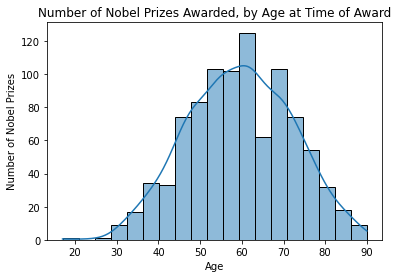

In [387]:
histplot = seaborn.histplot(nobel_data_valid['age'], kde=True)
histplot.set_xlabel('Age')
histplot.set_ylabel('Number of Nobel Prizes')
histplot.set_title('Number of Nobel Prizes Awarded, by Age at Time of Award')

In [388]:
print("The mean age of a Nobel laureate is "+str(nobel_data_valid['age'].mean())+", with a standard deviation of "+str(nobel_data_valid['age'].std())+".")

The mean age of a Nobel laureate is 59.4593147751606, with a standard deviation of 12.384339675481367.


The histogram shows that Nobel Prize laureates usually win at around the age of 60. As Age increases to around 60, there is an overall increase in the Count of Nobel Prizes. However, after around age of 60, as Age increases, there is an overall decrease in the Count of Nobel Prizes. There are some peaks around the age of 60, so we could looked into how the mean age of a Nobel laureate varies across categories.

In [389]:
medicine = nobel_data.loc[nobel_data['category']=='medicine','age'].mean()
print("The mean age of a Nobel laureate in Medicine is "+str(medicine))

physics = nobel_data.loc[nobel_data['category']=='physics','age'].mean()
print("The mean age of a Nobel laureate in Physics is "+str(physics))

chemistry = nobel_data.loc[nobel_data['category']=='chemistry','age'].mean()
print("The mean age of a Nobel laureate in Chemistry is "+str(chemistry))

economics = nobel_data.loc[nobel_data['category']=='economics','age'].mean()
print("The mean age of a Nobel laureate in Economics is "+str(economics))

literature = nobel_data.loc[nobel_data['category']=='literature','age'].mean()
print("The mean age of a Nobel laureate in Literature is "+str(literature))

The mean age of a Nobel laureate in Medicine is 57.57333333333333
The mean age of a Nobel laureate in Physics is 55.351351351351354
The mean age of a Nobel laureate in Chemistry is 57.83505154639175
The mean age of a Nobel laureate in Economics is 66.34939759036145
The mean age of a Nobel laureate in Literature is 64.67256637168141


<AxesSubplot:xlabel='age', ylabel='Count'>

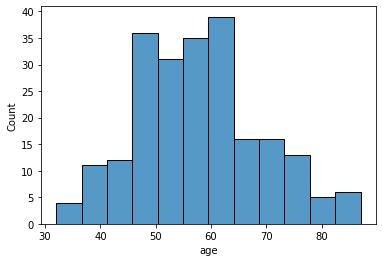

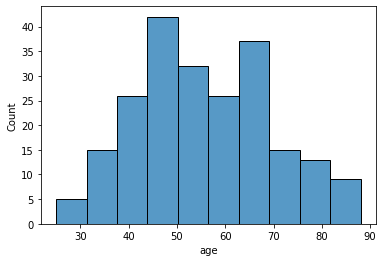

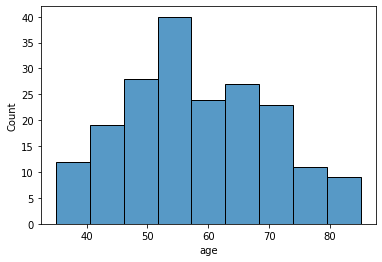

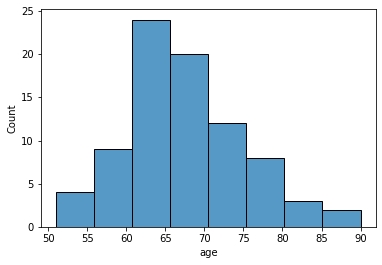

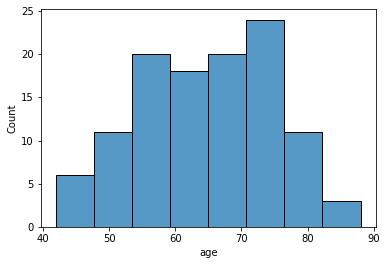

In [390]:
pyplot.figure()
seaborn.histplot(data=nobel_data_valid[nobel_data_valid["category"]=='medicine'], x= 'age')
pyplot.figure()
seaborn.histplot(data=nobel_data_valid[nobel_data_valid["category"]=='physics'], x= 'age')
pyplot.figure()
seaborn.histplot(data=nobel_data_valid[nobel_data_valid["category"]=='chemistry'], x= 'age')
pyplot.figure()
seaborn.histplot(data=nobel_data_valid[nobel_data_valid["category"]=='economics'], x= 'age')
pyplot.figure()
seaborn.histplot(data=nobel_data_valid[nobel_data_valid["category"]=='literature'], x= 'age')


There are slight variations in the mean across Medicine, Physics, and Chemistry but the mean age of a Nobel laureate stays around in late 50s. There are also slight variations in the mean across Economics and Literature, but the mean age of a Nobel laureate stays around late 60s. The laureates in Economics and Literature tend to win at a later age compared to laureates in Medicine, Physics, and Chemistry.

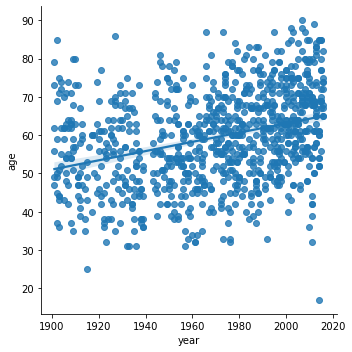

In [391]:
seaborn.lmplot(data = nobel_data_valid, x = 'year', y = 'age')

There is an increasing trend above, showing that Nobel Prize laureates are winning at a later age over time with some outliers. There are few outliers that stand out, such as a laureate who seemed to have won their prize at an age of around 25 close to the year 1915 and anoher who seemed to won their prize at an age of around 15 close to the year 2016.

In [392]:
nobel_data_train, nobel_data_test = train_test_split(nobel_data,test_size = 0.20)

In [393]:
def run_regression(variables, train, test, target):
    model = LinearRegression().fit(train[variables], train[target])
    
    predictions_for_train = model.predict(train[variables])
    predictions_for_test = model.predict(test[variables])
    
    rmse_train = np.sqrt(np.mean((predictions_for_train - train[target])**2))
    rmse_test = np.sqrt(np.mean((predictions_for_test - test[target])**2))

    mae_train = np.mean(np.abs(predictions_for_train - train[target]))
    mae_test = np.mean(np.abs(predictions_for_test - test[target]))

    print(f"The variable is: {variables}")
    print(f"The coefficient is: {model.coef_}")
    print(f"The intercept is: {model.intercept_}")
    print(f"The RMSE of the training set is: {rmse_train}")
    print(f"The RMSE of the testing set is: {rmse_test}")
    print(f"The MAE of the training set is: {mae_train}")
    print(f"The MAE of the testing set is: {mae_test}")

In [394]:
for variable in ["anglosphere", "gender_binary"]:
    run_regression([variable], nobel_data_train, nobel_data_test, "age")

The variable is: ['anglosphere']
The coefficient is: [2.62454751]
The intercept is: 56.112612612612615
The RMSE of the training set is: 16.484068645107698
The RMSE of the testing set is: 16.2201716378453
The MAE of the training set is: 12.017237734762327
The MAE of the testing set is: 12.164017304749859
The variable is: ['gender_binary']
The coefficient is: [21.154662]
The intercept is: 37.716666666666676
The RMSE of the training set is: 15.538520109344724
The RMSE of the testing set is: 15.340976260647794
The MAE of the training set is: 11.812169636814804
The MAE of the testing set is: 11.786770360223967


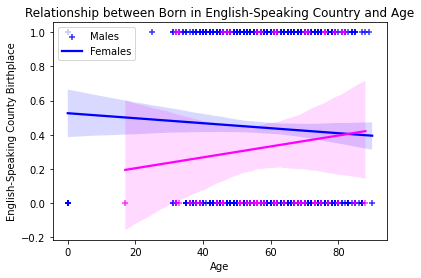

In [395]:
statistics_male = nobel_data[nobel_data['gender'] == 'male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

statistics_female = nobel_data[nobel_data['gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

fig = pyplot.figure()
df_males = nobel_data[nobel_data['gender'] == 'male']
df_females = nobel_data[nobel_data['gender'] == 'female']
seaborn.regplot(x=df_males.age, y=df_males.anglosphere, color='blue', marker='+')
seaborn.regplot(x=df_females.age, y=df_females.anglosphere, color='magenta', marker='+')

pyplot.legend(labels=['Males', 'Females'])
pyplot.title('Relationship between Born in English-Speaking Country and Age')
pyplot.xlabel('Age')
pyplot.ylabel('English-Speaking County Birthplace');

In [396]:
data1 = nobel_data['anglosphere']
data2 = nobel_data['age']
stat, p = pearsonr(data1,data2)
print(p)

0.07378076056640956


There is a strong positive correlation between being born in an English-speaking country and winning a Nobel Prize 

In [397]:
data1 = nobel_data['gender_binary']
data2 = nobel_data['age']
stat, p = pearsonr(data1,data2)
print(p)
if p>0.05:
    print('probably independent')
else:
    print('probably dependent')

5.427236219407555e-27
probably dependent


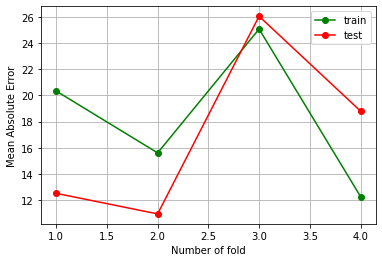

In [398]:
#fold = KFold(n_splits = 20, random_state = 1,shuffle = True)
#score = cross_val_score(estimator = LogisticRegression(), X = nobel_data[['anglosphere','gender_binary']], y = nobel_data["age"], cv = fold, scoring = 'f1')
#print(score)
#print(np.mean(score))
#print(np.std(score))
features = ['anglosphere','gender_binary']
for column in nobel_data.columns:
    if column == 'anglosphere'and'gender_binary'and'share':
        features.append(column)
X = nobel_data[features]
y = nobel_data['age']

kf = KFold(n_splits=4)
mae_train = []
mae_test = []
Y = nobel_data['age']
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=2)
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

folds = range(1, kf.get_n_splits() + 1)
pyplot.plot(folds, mae_train, 'o-', color='green', label='train')
pyplot.plot(folds, mae_test, 'o-', color='red', label='test')
pyplot.legend()
pyplot.grid()
pyplot.xlabel('Number of fold')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()

Gender has a greater influence on the age of the Nobel Prize laureate at win compared to being born in an English-speaking country. 

#### Section 2: Nobel Awards by country

First, we print out the list of the 5 countries home to the most laureates: 

In [399]:
laur_countries = nobel_data['bornCountryCode'].value_counts()
laur_countries.head()

US    275
GB    102
DE     89
FR     56
PL     30
Name: bornCountryCode, dtype: int64

The five countries that produced the most Nobel laureates are the United States, the United Kingdom, Germany, France, and Poland. The presence of two Anglosphere countries in the top 5 indicates that our Hypothesis 2 may be proven correct, with some further analysis.

Next, we find the number of countries that are represented by only a single laureate: 

In [400]:
least_laur_countries = laur_countries.sort_values(ascending = True)
least_laur_countries.value_counts()[1]

27

There are 27 countries (of the 76 represented by a Nobel laureate) home to only a single Nobel Prize winner. Combined with the high award counts for the top 5 countries, this seems to indicate a fairly strong preference for a small set of countries. 

To get a sense of the shape of this distribution, we plot a histogram of each country's laureates: 

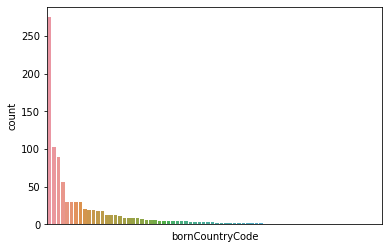

In [401]:
ax = seaborn.countplot(x = 'bornCountryCode', data=nobel_data, order=laur_countries.index)
ax.set(xticks = [])
pyplot.show()

This plot shows an immense disparity between countries, with the sharp (negative) logarithmic relationship that was indicated by the above statistics. Clearly, figures from certain countries appear to be favored by the Nobel committee for nomination and awards; we now move to examine whether a country being a part of the Anglosphere makes its scholars and public figures more likely to win Nobel Prizes. 

In [402]:
print(str(nobel_data['anglosphere'].sum()) + " out of the total " + str(len(nobel_data)) + " Nobel Prize laureates, or " + str(round((nobel_data['anglosphere'].sum()/len(nobel_data))*100, 2)) + " percent, are from one of the five Anglosphere countries.")

409 out of the total 969 Nobel Prize laureates, or 42.21 percent, are from one of the five Anglosphere countries.


In [403]:
print("Of those, " + str((nobel_data['bornCountryCode'] == 'US').sum()) + ", or " + str(round((nobel_data['bornCountryCode'] == 'US').sum()/len(nobel_data)*100, 2)) + " percent of all laureates, are from the United States.")

Of those, 275, or 28.38 percent of all laureates, are from the United States.


In [404]:
non_us_anglo = (nobel_data['bornCountryCode'] == 'GB').sum() + (nobel_data['bornCountryCode'] == 'CA').sum() + (nobel_data['bornCountryCode'] == 'NZ').sum() + (nobel_data['bornCountryCode'] == 'AU').sum()
print(str(non_us_anglo) + ", or " + str(round(non_us_anglo/len(nobel_data)*100, 2)) + " percent of all laureates, are from a non-US Anglosphere country.")

134, or 13.83 percent of all laureates, are from a non-US Anglosphere country.


<AxesSubplot:xlabel='anglosphere', ylabel='count'>

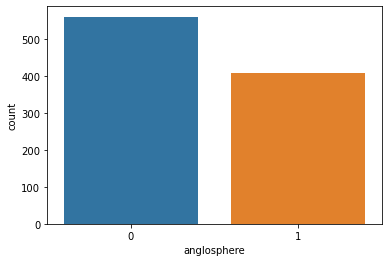

In [405]:
seaborn.countplot(x = 'anglosphere', data=nobel_data)

In [406]:
nobel_data_countries = nobel_data
print("There are " + str(nobel_data_countries['bornCountryCode'].isna().sum()) + " laureates without a single country of origin, due to their status as an international organization.")
nobel_data_countries.loc[nobel_data_countries['bornCountryCode'].isna()].head()

There are 28 laureates without a single country of origin, due to their status as an international organization.


,Unnamed: 0,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,...,category,overallMotivation,share,motivation,name,city,country,age,anglosphere,gender_binary
489,489,467,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,peace,NaN,1.0,NaN,NaN,NaN,NaN,0,0,0
498,498,477,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,peace,NaN,1.0,NaN,NaN,NaN,NaN,0,0,0
503,503,482,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,peace,NaN,1.0,NaN,NaN,NaN,NaN,0,0,0
504,504,482,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,peace,NaN,1.0,NaN,NaN,NaN,NaN,0,0,0
505,505,482,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,peace,NaN,2.0,NaN,NaN,NaN,NaN,0,0,0


As such, we fit a logistic regression to a dataset without these observations, to predict whether a country is a part of the Anglosphere based on how many Nobel laureates were born there.

In [407]:
nobel_data_countries = nobel_data_countries.loc[nobel_data_countries['bornCountryCode'].notna()]
nobel_data_countries['count'] = nobel_data_countries.groupby('bornCountryCode')['bornCountryCode'].transform('count')

anglo_model = LogisticRegression().fit(nobel_data_countries[['count']],nobel_data_countries['anglosphere'])
print("The coefficient of the logistic regression is " + str(round(float(anglo_model.coef_), 4)))
print("The intercept of the logistic regression is " + str(round(float(anglo_model.intercept_), 4)))

The coefficient of the logistic regression is 0.0394
The intercept of the logistic regression is -3.6323


/var/folders/p3/w8nfzkdj3xd2g8gpzv6css9m0000gn/T/ipykernel_37564/3317845230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel_data_countries['count'] = nobel_data_countries.groupby('bornCountryCode')['bornCountryCode'].transform('count')


ModuleNotFoundError: No module named 'statsmodels'

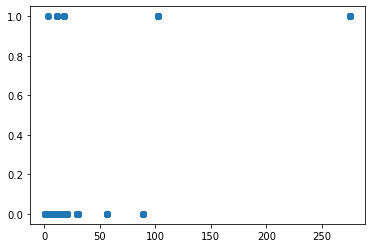

In [408]:
seaborn.regplot(data=nobel_data_countries, x='count', y='anglosphere', logistic=True, fit_reg= True)

In [ ]:
train_predict = anglo_model.predict(nobel_data_countries[['count']])
train_acc = metrics.accuracy_score(nobel_data_countries['anglosphere'], train_predict) 
train_prec = metrics.precision_score(nobel_data_countries['anglosphere'], train_predict)
train_recall = metrics.recall_score(nobel_data_countries['anglosphere'], train_predict) 
train_F1 = metrics.f1_score(nobel_data_countries['anglosphere'], train_predict)
print(train_acc)
print(train_prec)
print(train_recall)
print(train_F1)

0.9659936238044633
1.0
0.921760391198044
0.9592875318066157


## Evaluation of Significance

## Interpretation and Conclusions

**Hypothesis 1**

Our hypothesis was not supported by our data analysis. Age has bearing on the likelihood of winning a Nobel Prize. A typical age of Nobel Prize laureate at the time of win is 59.4593147751606. When we looked closer at the mean of age in the five categories, there are differences in the age of a typical laureate. We noticed that Nobel Prize laureates are more likely to win in late 60s for Economics and Literature, but winning at late 50s is more likely for Medicine, Physics, and Chemistry. Gender is more influential on age at the time of winning the Nobel Prize than being from an English-speaking country.

## Limitations

One primary limitation of our data is that it was collected in 2016: there have been 6 years' worth of laureates since then, and thus 6 years of data we cannot work with. It is also of some concern that the most recent years are missing: if there are any trends over time in our data, this might limit our ability to accurately model those trends or make predictions. For example, with the raising awareness of gender equality and female awakening efforts in academia, a notable increase in female laureates occurred in the 6 years (2016-2022). 12 women won Nobel in that 6 years, and the total number of female laureates before 2016 is around 60. Therefore, we weren’t able to analyze the rapid change in gender bias. Additionally, a big health challenge, COVID, happened in the three years of the six years with missing data, so we couldn’t analyze how COVID played a role in scientific breakthroughs. Additionally, all the organizations and some people have missing data, such as birth dates, which means that we have to work around those missing data to complete our data analysis.

## Source Code

The shared repository for our project (which holds our source data as well as files for each phase of the project) can be found at: 

https://github.com/qbello22/2950-Project

## Acknowledgements

Kuzmenko, Maryna, 2016, "Nobel Prize - Dataset with Information about Prizes, Laureates and Countries", https://doi.org/10.7910/DVN/AGAFAQ, Harvard Dataverse, V1, UNF:6:McdDh+ldUTGgZDs5XVOQUA== [fileUNF]

Python ValueError: Time data 'Date' does not match format '%Y/%m/%d %H:%M:%S.%f'. (n.d.). Stack Overflow. Retrieved November 20, 2022, from https://stackoverflow.com/questions/42390293/python-valueerror-time-data-date-does-not-match-format-y-m-d-hms-f